# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [28]:
boston = load_boston()
data = boston['data']
feature_names = boston ['feature_names']
X =pd.DataFrame(data, columns=feature_names)
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [29]:
target = boston["target"]
y = pd.DataFrame(target, columns =["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [31]:
%%time
tsne = TSNE(n_components = 2, learning_rate=250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

CPU times: total: 6.48 s
Wall time: 1.8 s


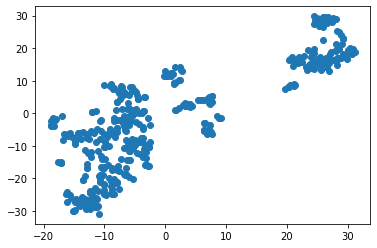

In [52]:
plt.scatter(X_train_tsne[:, 1], X_train_tsne[:,0])
plt.show()

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


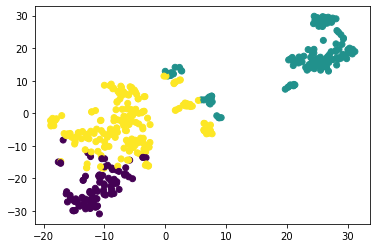

In [57]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:,1], X_train_tsne[:,0], c=labels_train)
plt.show()

In [40]:
print('кластер 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('кластер 2: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('кластер 3: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

кластер 1: 0.07356558139534886
кластер 2: 10.797028425196853
кластер 3: 0.42166020942408367


In [42]:
print('кластер 1: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('кластер 2: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('кластер 3: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

кластер 1: 27.788372093023252
кластер 2: 16.165354330708666
кластер 3: 24.958115183246072


# *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


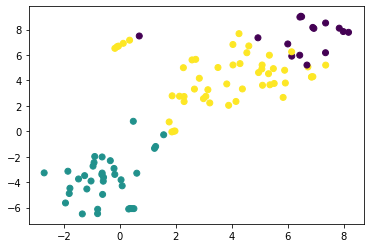

In [55]:
labels_test = kmeans.predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:,1], X_test_tsne[:,0], c=labels_test)
plt.show()

In [58]:
print('кластер 1: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('кластер 2: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('кластер 3: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

кластер 1: 0.062060000000000004
кластер 2: 10.165531142857143
кластер 3: 0.26607882352941176


In [59]:
print('кластер 1: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('кластер 2: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('кластер 3: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

кластер 1: 31.35
кластер 2: 16.437142857142856
кластер 3: 21.860784313725492
